# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [62]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [63]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [64]:
#  1. Get the total rides for each city type
city_type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [65]:
# 2. Get the total drivers for each city type
city_type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
city_type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [66]:
#  3. Get the total amount of fares for each city type
city_type_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [67]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_city = city_type_fare_count/city_type_ride_count
avg_fare_per_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [68]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = city_type_fare_count/city_type_driver_count
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [69]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":city_type_ride_count,
                                "Total Drivers":city_type_driver_count,
                                "Total Fares":city_type_fare_count,
                                "Average Fare per Ride":avg_fare_per_city,
                                "Average Fare per Driver":avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [70]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [71]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.1f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.1f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.0,78.0,"$4,327.93",$34.62,$55.49
Suburban,625.0,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625.0","2,405.0","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [72]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


In [74]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_fare_type_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]
pyber_fare_type_date

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [75]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_fare_type_date = pyber_fare_type_date.reset_index()
pyber_fare_type_date["date"] = pd.to_datetime(pyber_fare_type_date["date"])

In [76]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_fare_type_date_pivot = pyber_fare_type_date.pivot(index = "date", columns = "type", values = "fare")
pyber_fare_type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [77]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_fare_type_date_loc = pyber_fare_type_date_pivot.loc['2019-01-01':'2019-04-28']
pyber_fare_type_date_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [79]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_fare_type_date_loc.index = pd.to_datetime(pyber_fare_type_date_loc.index)
pyber_fare_type_date_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [82]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fare_type_date_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [85]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_weekly = pyber_fare_type_date_loc.resample('W').sum()
sum_fares_weekly.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


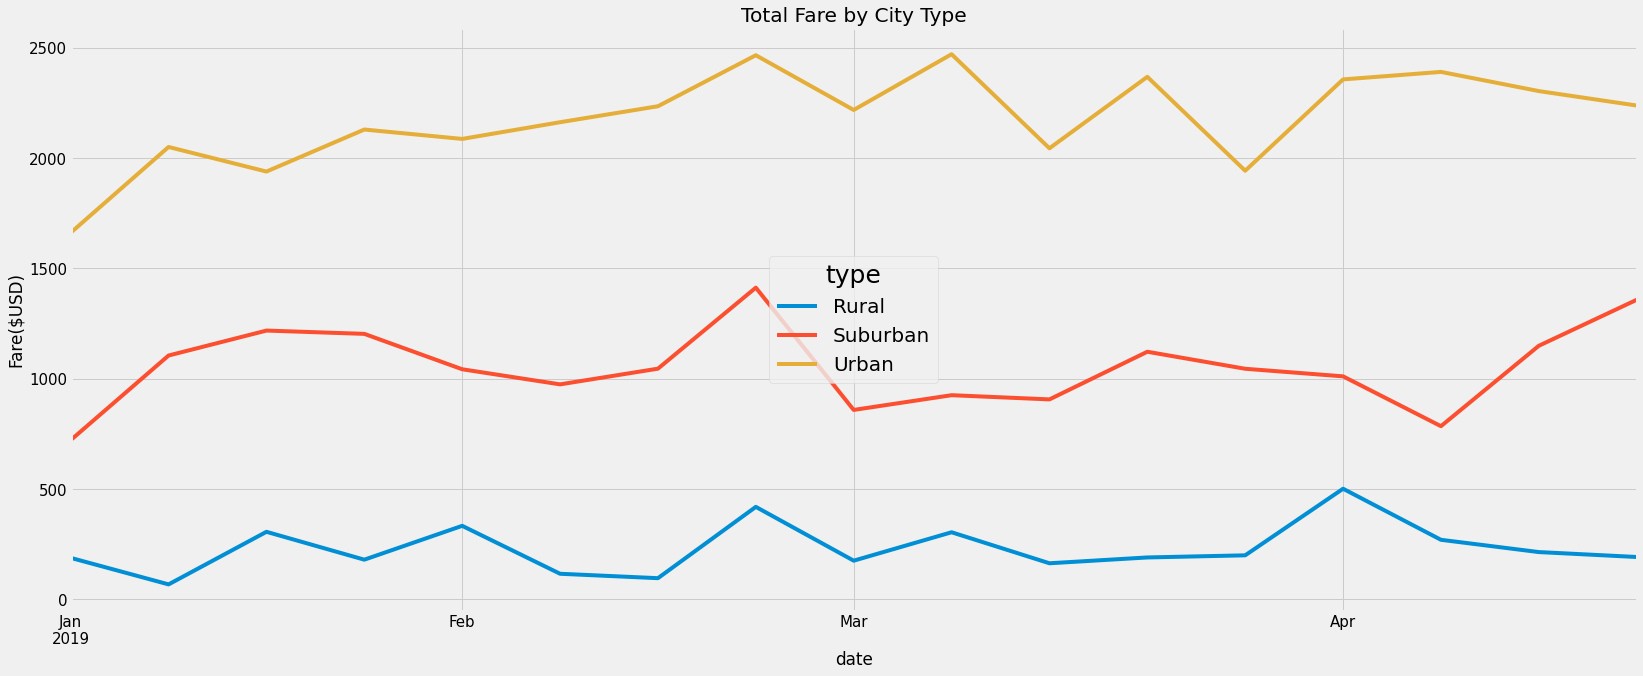

In [124]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig = sum_fares_weekly.plot(figsize = (25,10), fontsize = 15)
fig.set_title("Total Fare by City Type")
fig.set_ylabel("Fare($USD)")
fig.legend(loc = "center", prop = {"size" : 20}, title = "type", title_fontsize = 25)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("analysis/Total_Fare_by_City_Type")
#https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend (change legend font sizes)